### Name: Ntwali Bruno Bahongere
#### Course: Advanced Big Data and Data Mining
#### Residency Project_Shoppers Behavior Analysis

In [14]:
import kagglehub
import pandas as pd
import os
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Download latest version
path = kagglehub.dataset_download("subhajournal/shoppers-behavior-and-revenue")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\nBruno\.cache\kagglehub\datasets\subhajournal\shoppers-behavior-and-revenue\versions\1


In [6]:
# importing data to pandas dataframe
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
df = pd.read_csv(os.path.join(path, csv_files[0]))
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
# Data Exploration and Initial Analysis
print("Dataset Shape:", df.shape)
print("\nColumn Names and Data Types:")
print(df.dtypes)
print("\nDataset Info:")
df.info()
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (12330, 18)

Column Names and Data Types:
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administ

In [18]:
# Checcking for missing values
missing_values = df.isnull().sum()
print(missing_values)

print("\nMissing values percentage:")
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
print(missing_df)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Missing values percentage:
Empty DataFrame
Columns: [Column, Missing_Count, Missing_Percentage]
Index: []


In [11]:
# Check for duplicate records
print(f"Total records: {len(df)}")
print(f"Duplicate records: {df.duplicated().sum()}")
print(f"Unique records: {len(df) - df.duplicated().sum()}")

if df.duplicated().sum() > 0:
    print("\nDuplicate records preview:")
    print(df[df.duplicated()].head())

# Check for negative values in numeric columns that shouldn't be negative
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\nChecking for negative values in numeric columns:")
for col in numeric_cols:
    negative_count = (df[col] < 0).sum()
    if negative_count > 0:
        print(f"{col}: {negative_count} negative values")

# Check for outliers using IQR method
print("\nChecking for potential outliers (values beyond 3*IQR):")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if len(outliers) > 0:
        print(f"{col}: {len(outliers)} potential outliers ({len(outliers)/len(df)*100:.2f}%)")

# Check categorical variables
print("\nCategorical variables unique values:")
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values - {df[col].unique()}")

Total records: 12330
Duplicate records: 125
Unique records: 12205

Duplicate records preview:
     Administrative  Administrative_Duration  Informational  \
158               0                      0.0              0   
159               0                      0.0              0   
178               0                      0.0              0   
418               0                      0.0              0   
456               0                      0.0              0   

     Informational_Duration  ProductRelated  ProductRelated_Duration  \
158                     0.0               1                      0.0   
159                     0.0               1                      0.0   
178                     0.0               1                      0.0   
418                     0.0               1                      0.0   
456                     0.0               1                      0.0   

     BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
158          0.

In [13]:
if 'df_cleaned' not in locals():
	df_cleaned = df.copy().drop_duplicates()

print("\nData types after cleaning:")
print(df_cleaned.dtypes)

print("\nFirst 5 rows of cleaned data:")
print(df_cleaned.head())


Data types after cleaning:
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

First 5 rows of cleaned data:
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0           

In [15]:
# Explanatory Data Analysis (EDA) 

# Set plotting style for better visualizations
plt.style.use('default')
sns.set_style("whitegrid")
sns.set_palette("husl")

# Configure matplotlib for better plots
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3


Numerical features: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']


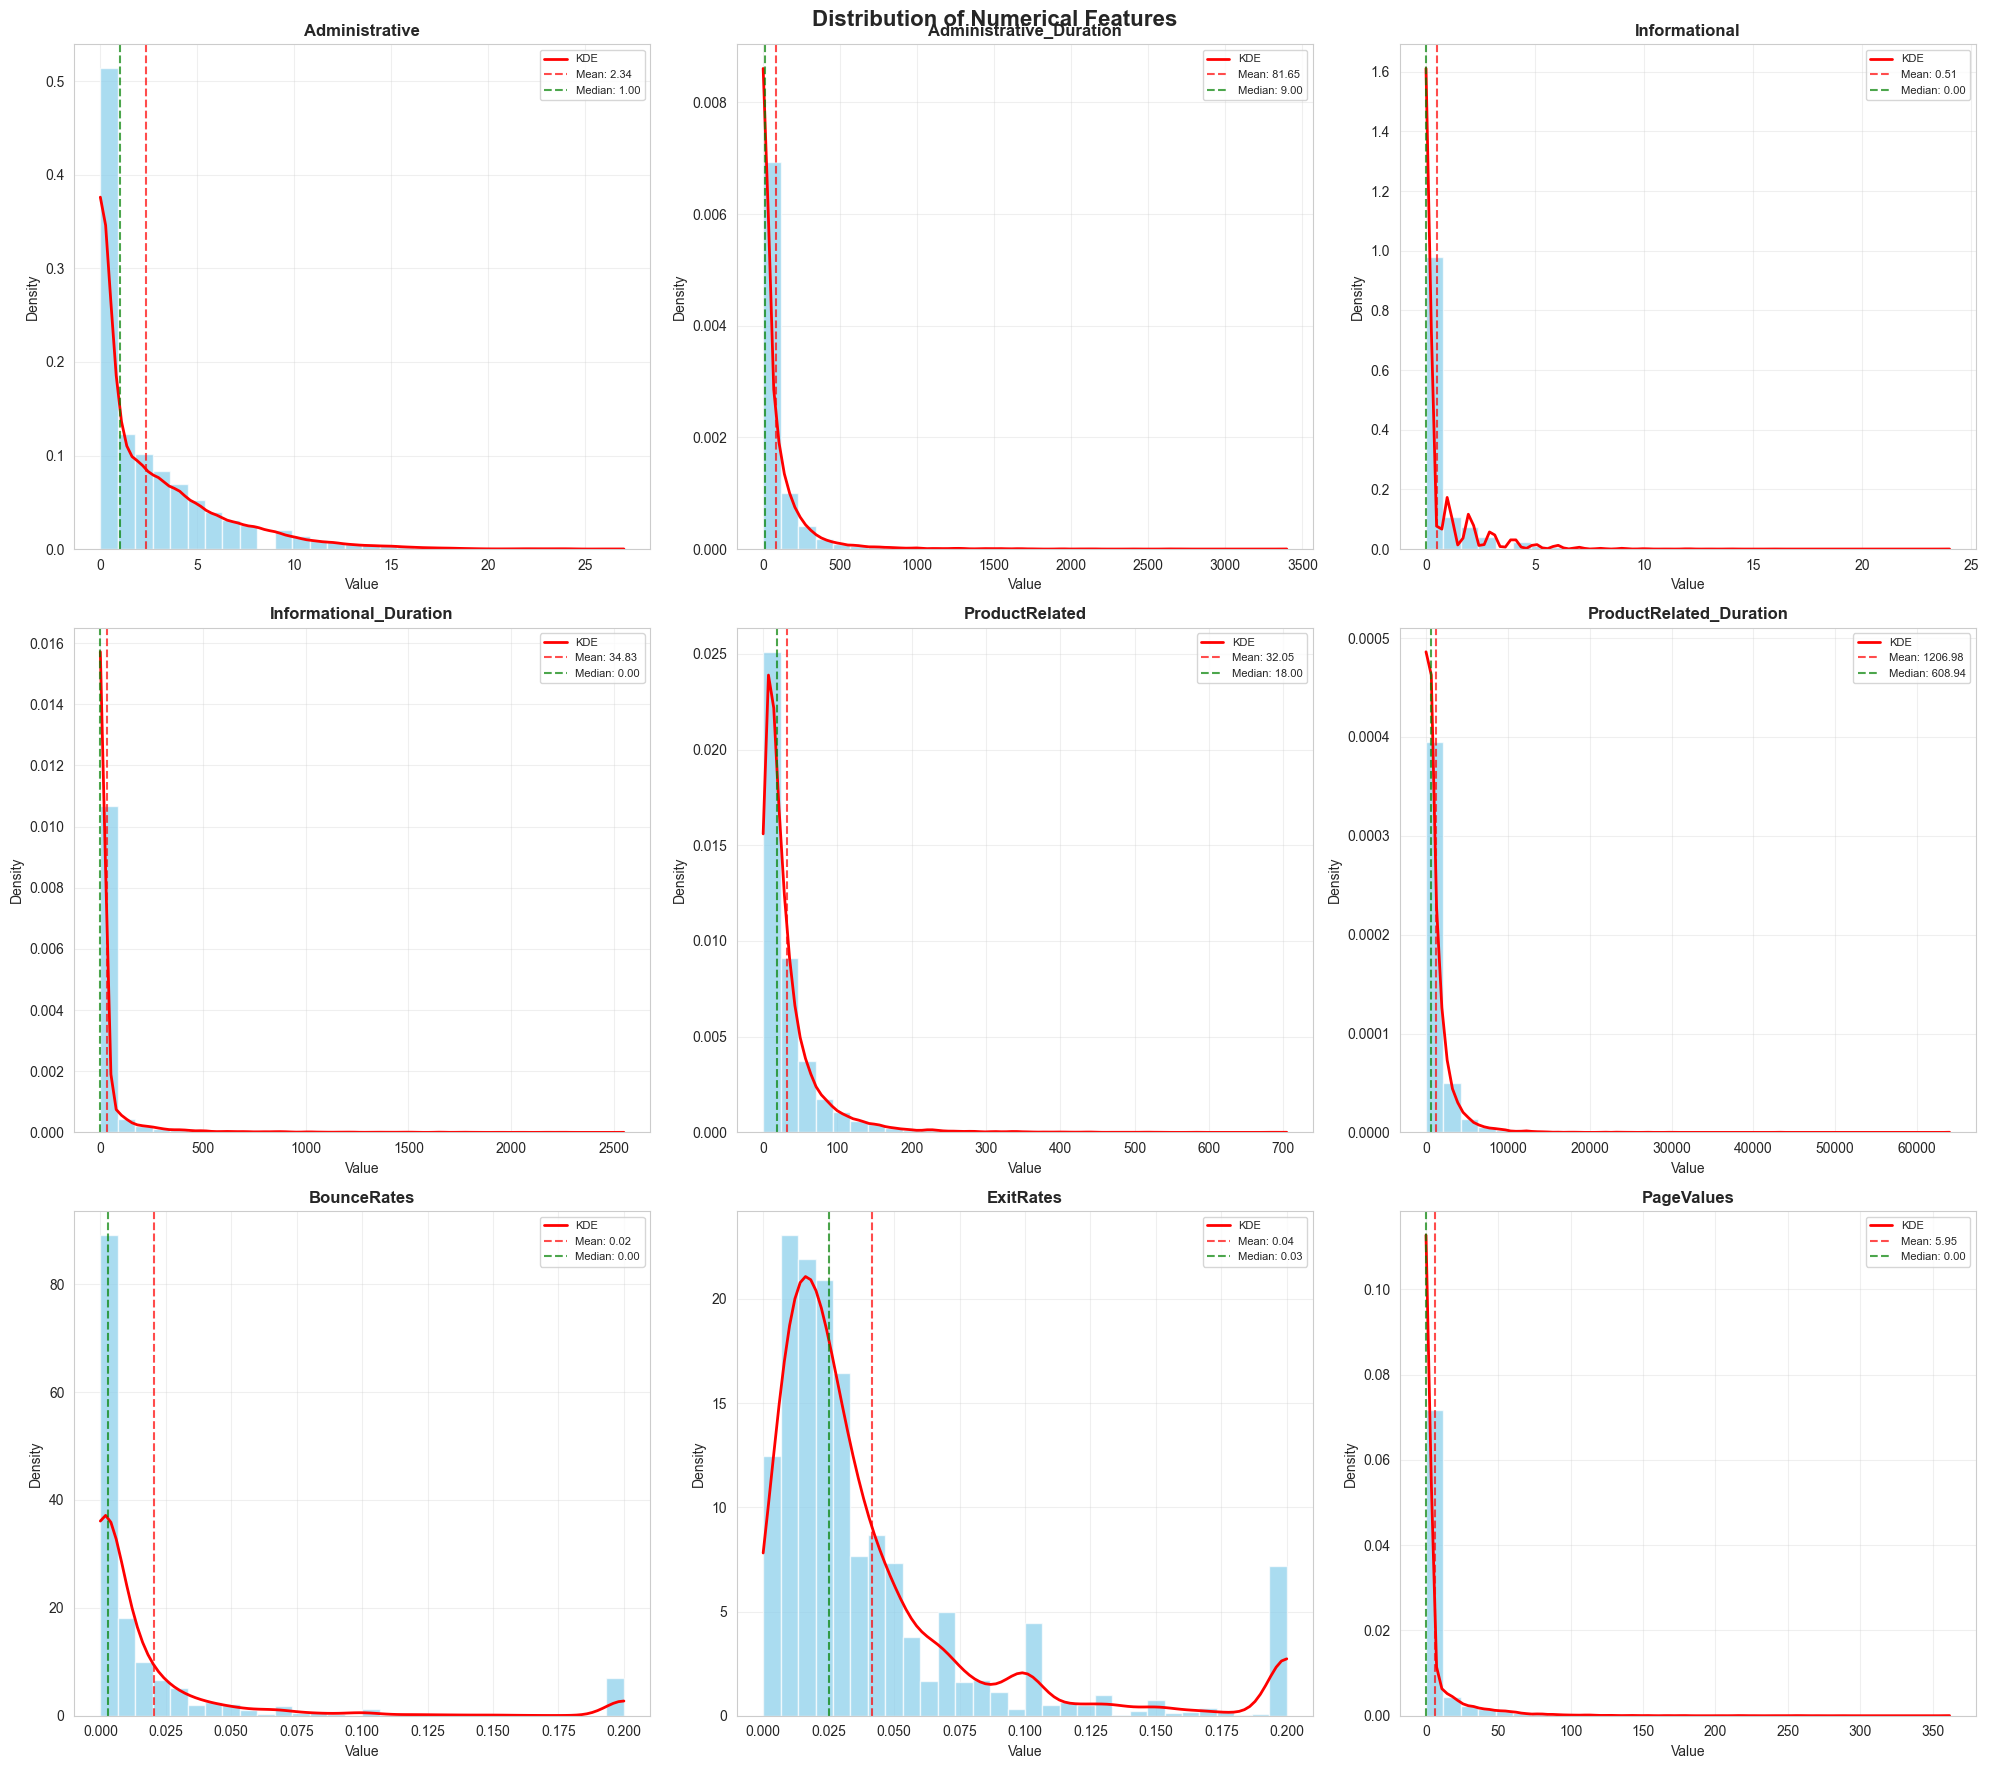


Detailed Statistical Summary:
--------------------------------------------------------------------------------

Administrative:
  Mean: 2.34 | Median: 1.00
  Std: 3.33 | Min: 0.00 | Max: 27.00
  Skewness: 1.95 | Kurtosis: 4.64
  Distribution: Highly skewed

Administrative_Duration:
  Mean: 81.65 | Median: 9.00
  Std: 177.49 | Min: 0.00 | Max: 3398.75
  Skewness: 5.59 | Kurtosis: 50.14
  Distribution: Highly skewed

Informational:
  Mean: 0.51 | Median: 0.00
  Std: 1.28 | Min: 0.00 | Max: 24.00
  Skewness: 4.01 | Kurtosis: 26.66
  Distribution: Highly skewed

Informational_Duration:
  Mean: 34.83 | Median: 0.00
  Std: 141.42 | Min: 0.00 | Max: 2549.38
  Skewness: 7.54 | Kurtosis: 75.53
  Distribution: Highly skewed

ProductRelated:
  Mean: 32.05 | Median: 18.00
  Std: 44.59 | Min: 0.00 | Max: 705.00
  Skewness: 4.33 | Kurtosis: 31.07
  Distribution: Highly skewed

ProductRelated_Duration:
  Mean: 1206.98 | Median: 608.94
  Std: 1919.60 | Min: 0.00 | Max: 63973.52
  Skewness: 7.25 | Kur

In [16]:
# Numeriacl features distribution analysis

# Identify numerical columns
numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical features: {numerical_cols}")

# Create distribution plots
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
fig.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold')

for i, col in enumerate(numerical_cols):
    if i < 9:  # Plot first 9 numerical columns
        row = i // 3
        col_idx = i % 3
        
        # Create histogram with KDE
        axes[row, col_idx].hist(df_cleaned[col], bins=30, alpha=0.7, color='skyblue', density=True)
        
        # Add KDE line
        try:
            kde_x = np.linspace(df_cleaned[col].min(), df_cleaned[col].max(), 100)
            kde = stats.gaussian_kde(df_cleaned[col].dropna())
            axes[row, col_idx].plot(kde_x, kde(kde_x), 'r-', linewidth=2, label='KDE')
        except:
            pass
            
        axes[row, col_idx].set_title(f'{col}', fontweight='bold')
        axes[row, col_idx].set_xlabel('Value')
        axes[row, col_idx].set_ylabel('Density')
        axes[row, col_idx].grid(True, alpha=0.3)
        
        # Add basic statistics as text
        mean_val = df_cleaned[col].mean()
        median_val = df_cleaned[col].median()
        axes[row, col_idx].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')
        axes[row, col_idx].axvline(median_val, color='green', linestyle='--', alpha=0.7, label=f'Median: {median_val:.2f}')
        axes[row, col_idx].legend(fontsize=8)

plt.tight_layout()
plt.show()

# Statistical summary of numerical features
print("\nDetailed Statistical Summary:")
print("-" * 80)
for col in numerical_cols[:6]:  # Focus on key columns
    print(f"\n{col}:")
    print(f"  Mean: {df_cleaned[col].mean():.2f} | Median: {df_cleaned[col].median():.2f}")
    print(f"  Std: {df_cleaned[col].std():.2f} | Min: {df_cleaned[col].min():.2f} | Max: {df_cleaned[col].max():.2f}")
    print(f"  Skewness: {df_cleaned[col].skew():.2f} | Kurtosis: {df_cleaned[col].kurtosis():.2f}")
    
    # Interpret skewness
    skew = df_cleaned[col].skew()
    if abs(skew) < 0.5:
        skew_interpretation = "Approximately symmetric"
    elif abs(skew) < 1:
        skew_interpretation = "Moderately skewed"
    else:
        skew_interpretation = "Highly skewed"
    print(f"  Distribution: {skew_interpretation}")

# Check for zero-inflated distributions
print("\n" + "="*40)
print("ZERO-INFLATED ANALYSIS")
print("="*40)
zero_inflation_summary = []
for col in numerical_cols:
    zero_count = (df_cleaned[col] == 0).sum()
    zero_pct = (zero_count / len(df_cleaned)) * 100
    if zero_pct > 10:  # Flag columns with >10% zeros
        zero_inflation_summary.append({
            'Column': col,
            'Zero_Count': zero_count,
            'Zero_Percentage': zero_pct
        })

if zero_inflation_summary:
    zero_df = pd.DataFrame(zero_inflation_summary)
    print("Columns with significant zero values (>10%):")
    print(zero_df.to_string(index=False))
    print("\nInsight: Zero-inflated features might need special treatment in modeling.")
else:
    print("No significant zero-inflation detected in numerical features.")

Categorical features: ['Month', 'VisitorType', 'Weekend', 'Revenue']


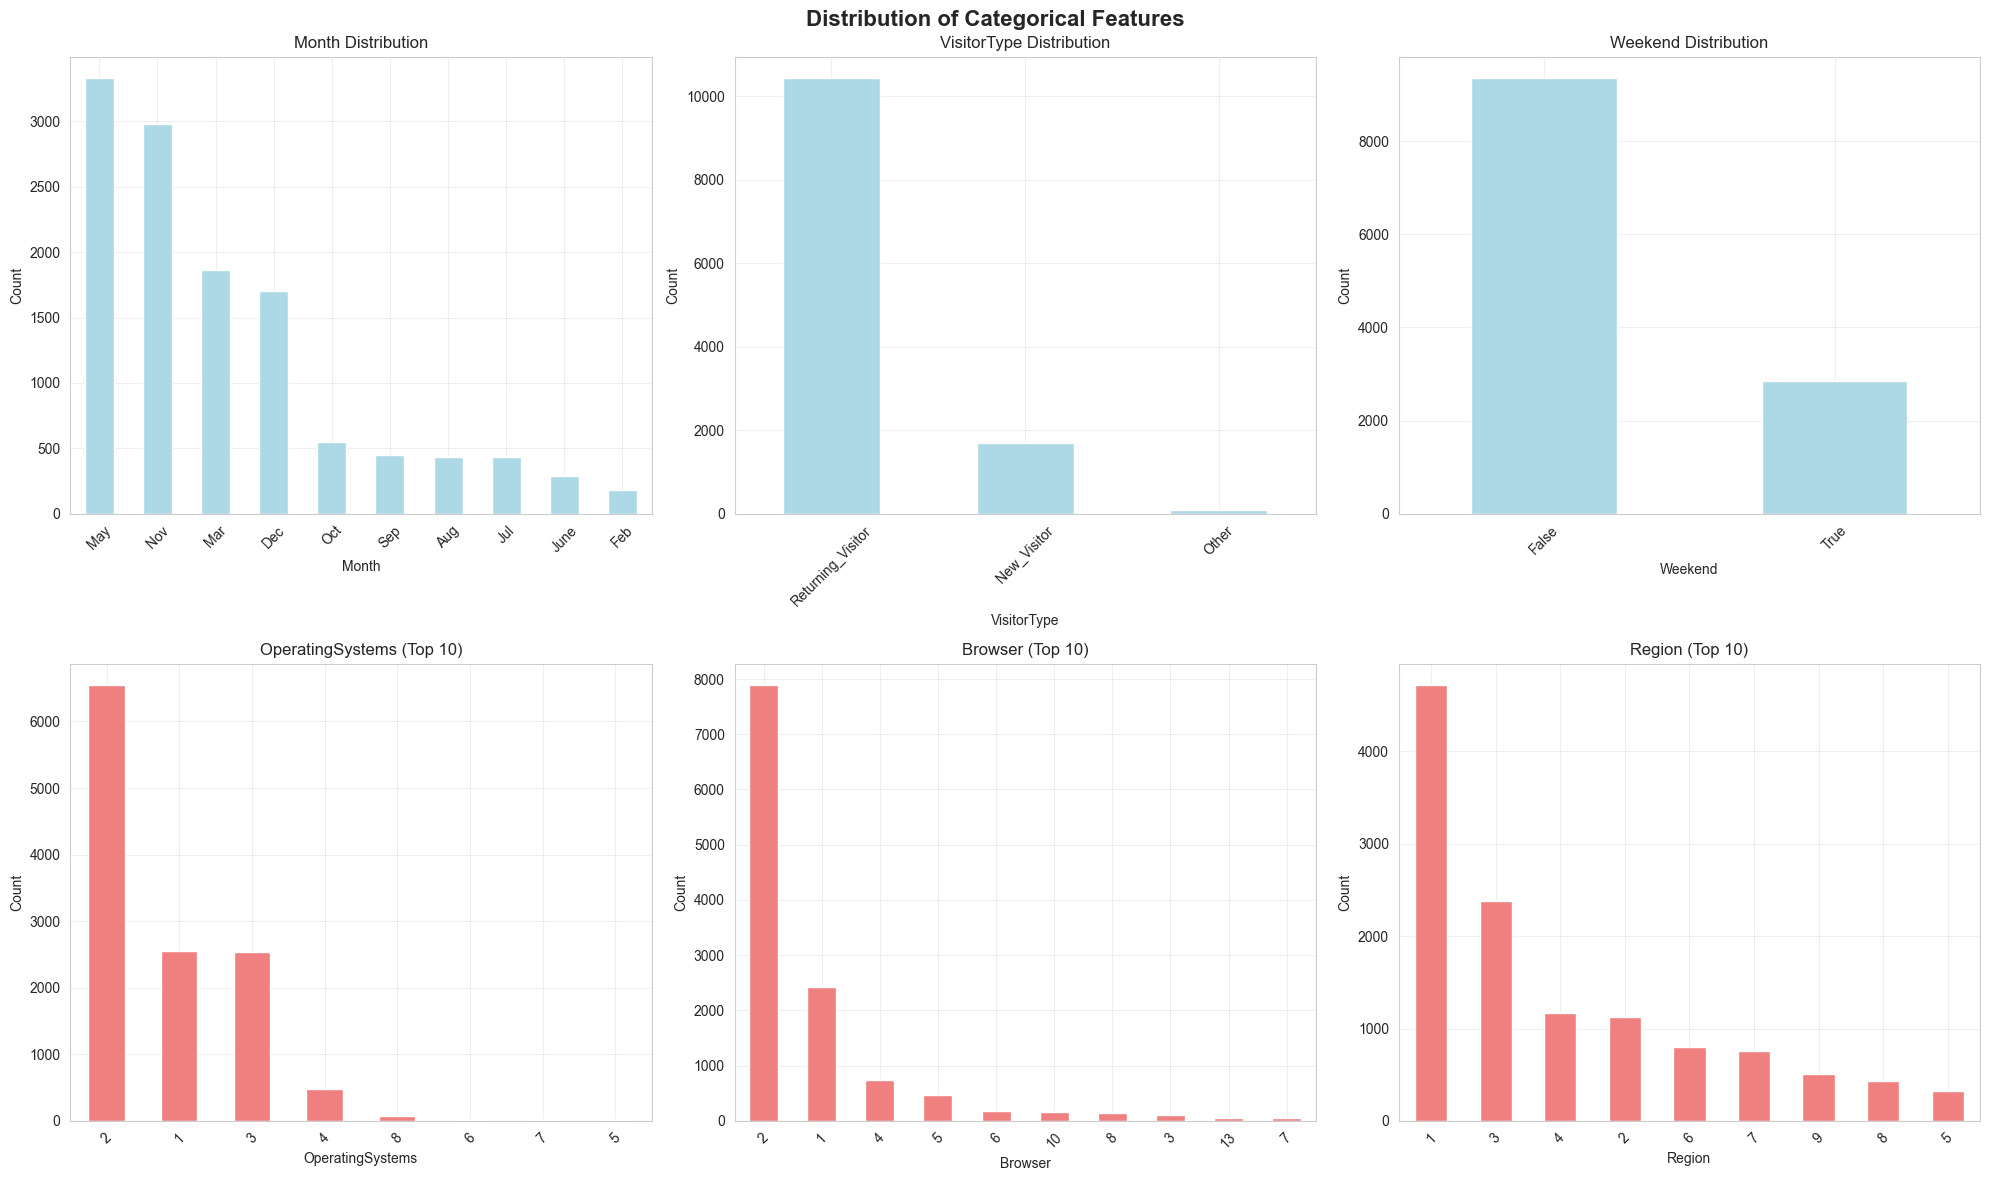


Categorical Features Summary:
------------------------------------------------------------

Month:
  Unique values: 10
    May: 3,329 (27.3%)
    Nov: 2,982 (24.4%)
    Mar: 1,860 (15.2%)
    Dec: 1,706 (14.0%)
    Oct: 549 (4.5%)
    Sep: 448 (3.7%)
    Aug: 433 (3.5%)
    Jul: 432 (3.5%)
    June: 285 (2.3%)
    Feb: 181 (1.5%)

VisitorType:
  Unique values: 3
    Returning_Visitor: 10,431 (85.5%)
    New_Visitor: 1,693 (13.9%)
    Other: 81 (0.7%)

Weekend:
  Unique values: 2
    False: 9,346 (76.6%)
    True: 2,859 (23.4%)

Revenue:
  Unique values: 2
    False: 10,297 (84.4%)
    True: 1,908 (15.6%)


In [19]:
# Categorical features analysis

# Identify categorical columns
categorical_cols = df_cleaned.select_dtypes(include=['object', 'bool']).columns.tolist()
print(f"Categorical features: {categorical_cols}")

# Create visualizations for categorical features
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Distribution of Categorical Features', fontsize=16, fontweight='bold')

categorical_plots = ['Month', 'VisitorType', 'Weekend', 'OperatingSystems', 'Browser', 'Region']

for i, col in enumerate(categorical_plots):
    if i < 6 and col in df_cleaned.columns:
        row = i // 3
        col_idx = i % 3
        
        if col in ['OperatingSystems', 'Browser', 'Region']:
            # For high-cardinality features, show top 10
            top_values = df_cleaned[col].value_counts().head(10)
            top_values.plot(kind='bar', ax=axes[row, col_idx], color='lightcoral')
            axes[row, col_idx].set_title(f'{col} (Top 10)')
        else:
            # For low-cardinality features, show all
            df_cleaned[col].value_counts().plot(kind='bar', ax=axes[row, col_idx], color='lightblue')
            axes[row, col_idx].set_title(f'{col} Distribution')
        
        axes[row, col_idx].set_xlabel(col)
        axes[row, col_idx].set_ylabel('Count')
        axes[row, col_idx].tick_params(axis='x', rotation=45)
        axes[row, col_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Detailed analysis of categorical features
print("\nCategorical Features Summary:")
print("-" * 60)
for col in categorical_cols:
    unique_count = df_cleaned[col].nunique()
    print(f"\n{col}:")
    print(f"  Unique values: {unique_count}")
    
    if unique_count <= 10:
        # Show all values for low cardinality
        value_counts = df_cleaned[col].value_counts()
        for value, count in value_counts.items():
            percentage = (count / len(df_cleaned)) * 100
            print(f"    {value}: {count:,} ({percentage:.1f}%)")
    else:
        # Show top 5 for high cardinality
        print("  Top 5 values:")
        value_counts = df_cleaned[col].value_counts().head(5)
        for value, count in value_counts.items():
            percentage = (count / len(df_cleaned)) * 100
            print(f"    {value}: {count:,} ({percentage:.1f}%)")
        print(f"    ... and {unique_count - 5} more values")


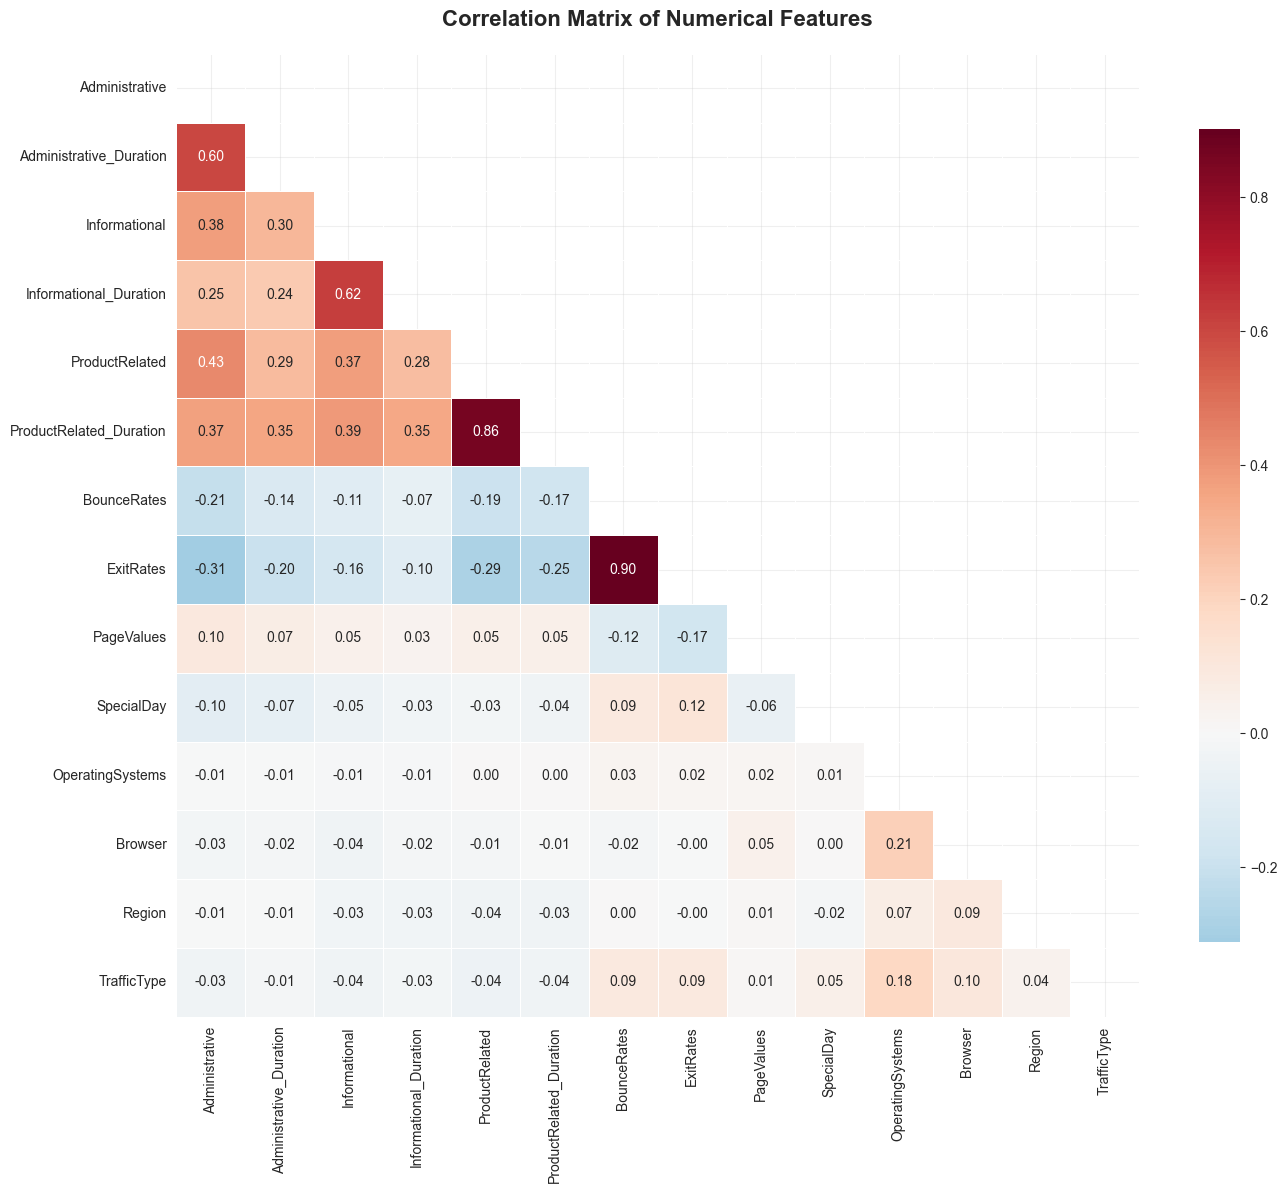

High Correlations (|correlation| > 0.7):
  ProductRelated ↔ ProductRelated_Duration: 0.860
  BounceRates ↔ ExitRates: 0.902

Correlation with Target Variable (Revenue):
--------------------------------------------------
  PageValues: 0.492 (Strong Positive)
  ExitRates: -0.204 (Moderate Negative)
  ProductRelated: 0.156 (Moderate Positive)
  ProductRelated_Duration: 0.150 (Moderate Positive)
  BounceRates: -0.145 (Moderate Negative)
  Administrative: 0.136 (Moderate Positive)
  Informational: 0.094 (Weak Positive)
  Administrative_Duration: 0.092 (Weak Positive)
  SpecialDay: -0.084 (Weak Negative)
  Informational_Duration: 0.069 (Weak Positive)
  Browser: 0.024 (Weak Positive)
  OperatingSystems: -0.015 (Weak Negative)
  Region: -0.013 (Weak Negative)
  TrafficType: -0.006 (Weak Negative)


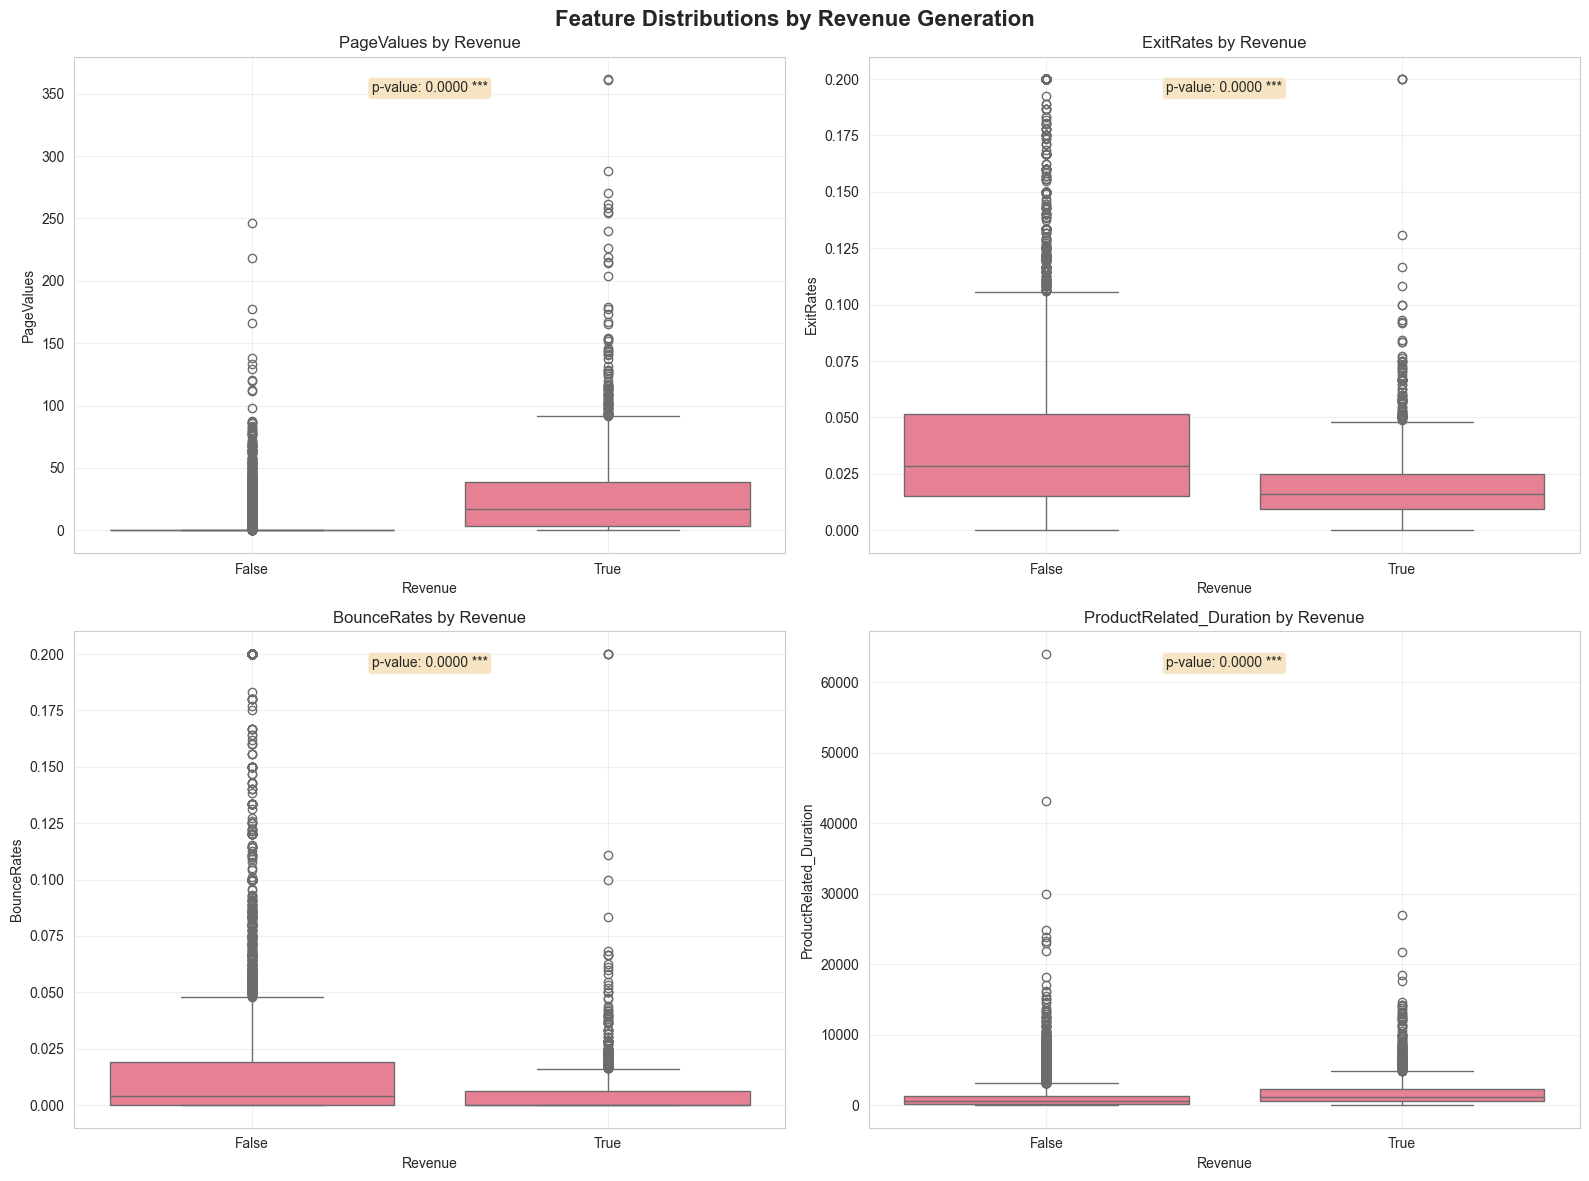


Statistical significance: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant


In [17]:
# Correlation analysis 

# Calculate correlation matrix for numerical features
numerical_features = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df_cleaned[numerical_features].corr()

# Create correlation heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Show only lower triangle
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Find high correlations (absolute value > 0.7)
high_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) > 0.7:
            high_correlations.append({
                'Feature_1': correlation_matrix.columns[i],
                'Feature_2': correlation_matrix.columns[j],
                'Correlation': correlation
            })

if high_correlations:
    print("High Correlations (|correlation| > 0.7):")
    for corr in high_correlations:
        print(f"  {corr['Feature_1']} ↔ {corr['Feature_2']}: {corr['Correlation']:.3f}")
else:
    print("No high correlations (>0.7) found between numerical features.")

# Correlation with target variable (Revenue)
# Convert Revenue to numeric for correlation
df_cleaned['Revenue_numeric'] = df_cleaned['Revenue'].astype(int)
target_correlations = df_cleaned[numerical_features + ['Revenue_numeric']].corr()['Revenue_numeric'].drop('Revenue_numeric')
target_correlations = target_correlations.sort_values(key=abs, ascending=False)

print(f"\nCorrelation with Target Variable (Revenue):")
print("-" * 50)
for feature, correlation in target_correlations.items():
    strength = "Strong" if abs(correlation) > 0.3 else "Moderate" if abs(correlation) > 0.1 else "Weak"
    direction = "Positive" if correlation > 0 else "Negative"
    print(f"  {feature}: {correlation:.3f} ({strength} {direction})")

# Feature relationships with Revenue - Box plots for key features
key_features = ['PageValues', 'ExitRates', 'BounceRates', 'ProductRelated_Duration']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Feature Distributions by Revenue Generation', fontsize=16, fontweight='bold')

for i, feature in enumerate(key_features):
    if feature in df_cleaned.columns:
        row = i // 2
        col = i % 2
        
        sns.boxplot(data=df_cleaned, x='Revenue', y=feature, ax=axes[row, col])
        axes[row, col].set_title(f'{feature} by Revenue')
        axes[row, col].grid(True, alpha=0.3)
        
        # Add statistical test result
        revenue_group = df_cleaned[df_cleaned['Revenue'] == True][feature]
        no_revenue_group = df_cleaned[df_cleaned['Revenue'] == False][feature]
        
        # Perform t-test
        try:
            stat, p_value = stats.ttest_ind(revenue_group.dropna(), no_revenue_group.dropna())
            significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
            axes[row, col].text(0.5, 0.95, f'p-value: {p_value:.4f} {significance}', 
                               transform=axes[row, col].transAxes, ha='center', va='top',
                               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        except:
            pass

plt.tight_layout()
plt.show()

print("\nStatistical significance: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant")